In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def func(a, b, c, d, e, x):
    return -a*x**4*np.sin(np.cos(x)) + b*x**3+c*x**2 + d*x + e

In [4]:
a, b, c, d, e = 12, -18, 5, 10, -30
x_min = -50
x_max = 50
x_step = 0.01
x = np.arange (x_min, x_max, x_step) 

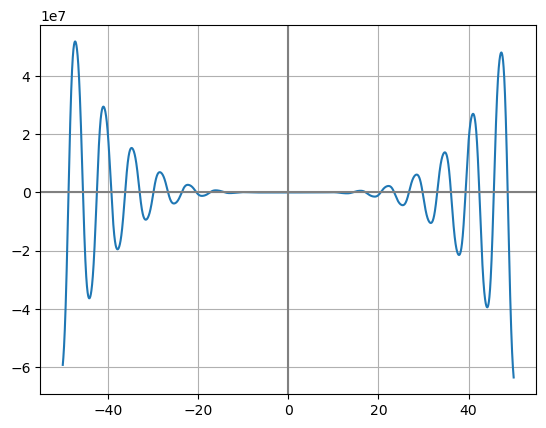

In [5]:
# Выводим график 
y = func(a, b, c, d, e, x)
plt.plot(x, y) 
plt.axhline(0,color='grey')
plt.axvline(0,color='grey')

plt.grid()

In [6]:
# функция находит точки пересечения графика с осью X
def find_roots(a, b, c, d, e, x):
    results = []
    y_prev = None
    for i in x:
        y = func(a, b, c, d, e, i)
        if y_prev is None:
            y_prev = y
            continue     
        if y > 0 and y_prev < 0:
            if abs(y) < abs(y_prev):
                results.append(round(i, 7))
            else:
                results.append(round(i-0.01, 7))
        elif y < 0 and y_prev > 0:
            if abs(y) < abs(y_prev):
                results.append(round(i, 7))
            else:
                results.append(round(i-0.01, 7))
        y_prev = y
    return results    

In [7]:
roots = find_roots(a, b, c, d, e, x)
#roots

In [8]:
# поиск максимальных вершин:
def find_max(a, b, c, d, e, x):
    
    extremes_max = []
    for i in x:
        dx1 = func(a, b, c, d, e, i)
        dx2 = func(a, b, c, d, e, i+0.01)
        dx3 = func(a, b, c, d, e, i+0.01+0.01)
        if dx1 < dx2 < dx3:
            continue
        if dx1 < dx2 > dx3:
            extremes_max.append([round(i, 2), dx2])
            
    return extremes_max

extremes_max = find_max(a, b, c, d, e, x)
#extremes_max

In [9]:
# поиск минимальных вершин:
def find_min(a, b, c, d, e, x):
    
    extremes_min = []
    for i in x:
        dx1 = func(a, b, c, d, e, i)
        dx2 = func(a, b, c, d, e, i+0.01)
        dx3 = func(a, b, c, d, e, i+0.01+0.01)
        if dx1 > dx2 > dx3:
            continue
        if dx1 > dx2 < dx3:
            extremes_min.append([round(i, 2), dx2])
            
    return extremes_min

extremes_min = find_min(a, b, c, d, e, x)
#extremes_min

In [10]:
# объединение координат корней и вершин в один список
def x_to_xy(x):
    return [x, 0]

dots = list(map(x_to_xy,roots)) + extremes_min + extremes_max + [[x_min, func(a,b,c,d,e,x_min)]] + [[x_max, func(a,b,c,d,e,x_max)]] 

# сортировка списка по первому элементу - значению X
dots.sort()
#dots

In [11]:
# нахождение отрезков возрастания и убывания функции выше 0 и ниже 0

ranges_up_positive= [] # отрезок возрастания функции выше 0
ranges_down_positive = [] # отрезок убывания функции выше 0
ranges_down_negative = [] # отрезок возрастания функции ниже 0
ranges_up_negative = [] # отрезок убывания функции ниже 0

for i in range(len(dots)):
    if i == 0:
        continue
    current_x = dots[i][0]
    current_y = dots[i][1]
    previous_x = dots[i-1][0]
    previous_y = dots[i-1][1]
    if current_y > previous_y:
        if current_y > 0:
            ranges_up_positive.append(np.arange(previous_x,current_x, 0.01))
        else:
            ranges_up_negative.append(np.arange(previous_x,current_x, 0.01))
    else:
        if current_y >= 0:
            ranges_down_positive.append(np.arange(previous_x,current_x, 0.01))
        else:
            ranges_down_negative.append(np.arange(previous_x,current_x, 0.01))

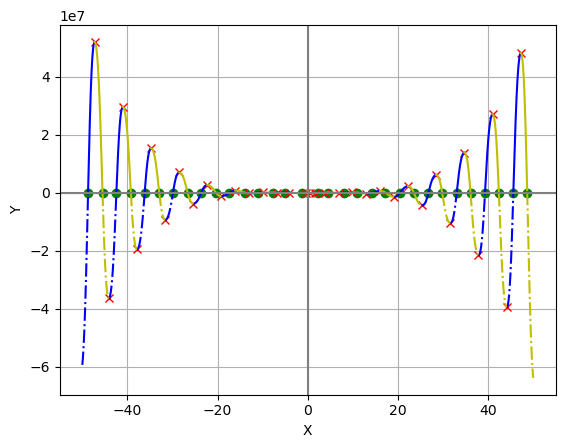

In [12]:
# вывод графика

def plot_add_roots(m):
    for i in m:
        plt.plot(i, 0, 'go')

def plot_add_dots(lst):
    for i in lst:
        x = i[0]
        y = i[1]
        plt.plot(x, y, 'rx')
        
def plot_add_line(lst, line_style, plot_style):
    plt.rcParams['lines.linestyle'] = line_style
    for i in lst:
        plt.plot(i, func(a, b, c, d, e, i), plot_style)
        

plot_add_roots(roots) 

plot_add_dots(extremes_max)
plot_add_dots(extremes_min)
plot_add_line(ranges_up_positive, '-', 'b')
plot_add_line(ranges_up_negative, '-.', 'b')
plot_add_line(ranges_down_positive, '-', 'y')
plot_add_line(ranges_down_negative, '-.', 'y')

plt.xlabel("X")
plt.ylabel("Y")
plt.rcParams['lines.linestyle'] = '-'
plt.axhline(0,color='grey')
plt.axvline(0,color='grey')

plt.grid()
